In [1]:
# %load /home/tony/Desktop/PythonScripts/KAT/planner.py
from astropy.coordinates import SkyCoord, EarthLocation
from astropy.time import Time
import astropy.units as u
#
from astroplan import FixedTarget, Observer, time_grid_from_range
import astroplan.plots as apl
#
import matplotlib.pyplot as plt 
from pytz import timezone
import numpy as np
%matplotlib inline



In [2]:
longitude=21.388 * u.deg
latitude= -30.7148 * u.deg
elevation= 1054* u.m

location=EarthLocation.from_geodetic(longitude,latitude,elevation)

kat7= Observer(name='kat-7', location=location, pressure=0.89* u.bar, \
      relative_humidity=0.1, temperature=20 *u.deg_C, \
      timezone=timezone('Africa/Johannesburg'), description="KAT-7 Site, Karoo,RSA")


In [3]:
coordinates = SkyCoord('12h56m11.166560s', '-05d47m21.524580s', frame='icrs')
target = FixedTarget(name='3C279', coord=coordinates)

coordinates = SkyCoord('13h31m08.287984s', '+30d30m32.9958850s', frame='icrs')
bpcal=FixedTarget(name='3C286', coord=coordinates)

coordinates = SkyCoord('12h29m06.670s', '+02d03m08.598190s', frame='icrs')
cal1=FixedTarget(name='3C273', coord=coordinates)

coordinates = SkyCoord('05h21m09.90s', '+16d38m22.05s', frame='icrs')
cal2=FixedTarget(name='3C138', coord=coordinates)


In [4]:

time=Time('2016-04-05 22:00:00')
transit=kat7.target_meridian_transit_time(time,target)

# shift to nearest transit
rise_t=kat7.target_rise_time(transit,target,'previous',horizon=20*u.deg)
set_t=kat7.target_set_time(transit,target,'next',horizon=20*u.deg )


print "rise   ", rise_t.to_datetime() 
print "transit", transit.to_datetime()
print "set    ", set_t.to_datetime()

print "Up for",  (set_t-rise_t).to('h')

hoursup=(set_t-rise_t).to('h') # number of hours up
hrs=hoursup.value # to a float
steps=int(4*hrs) # 4 steps per hour

rise    2016-04-05 17:52:41.241326
transit 2016-04-05 22:32:53.023242
set     2016-04-06 03:13:05.125977
Up for 9.33996795863 h


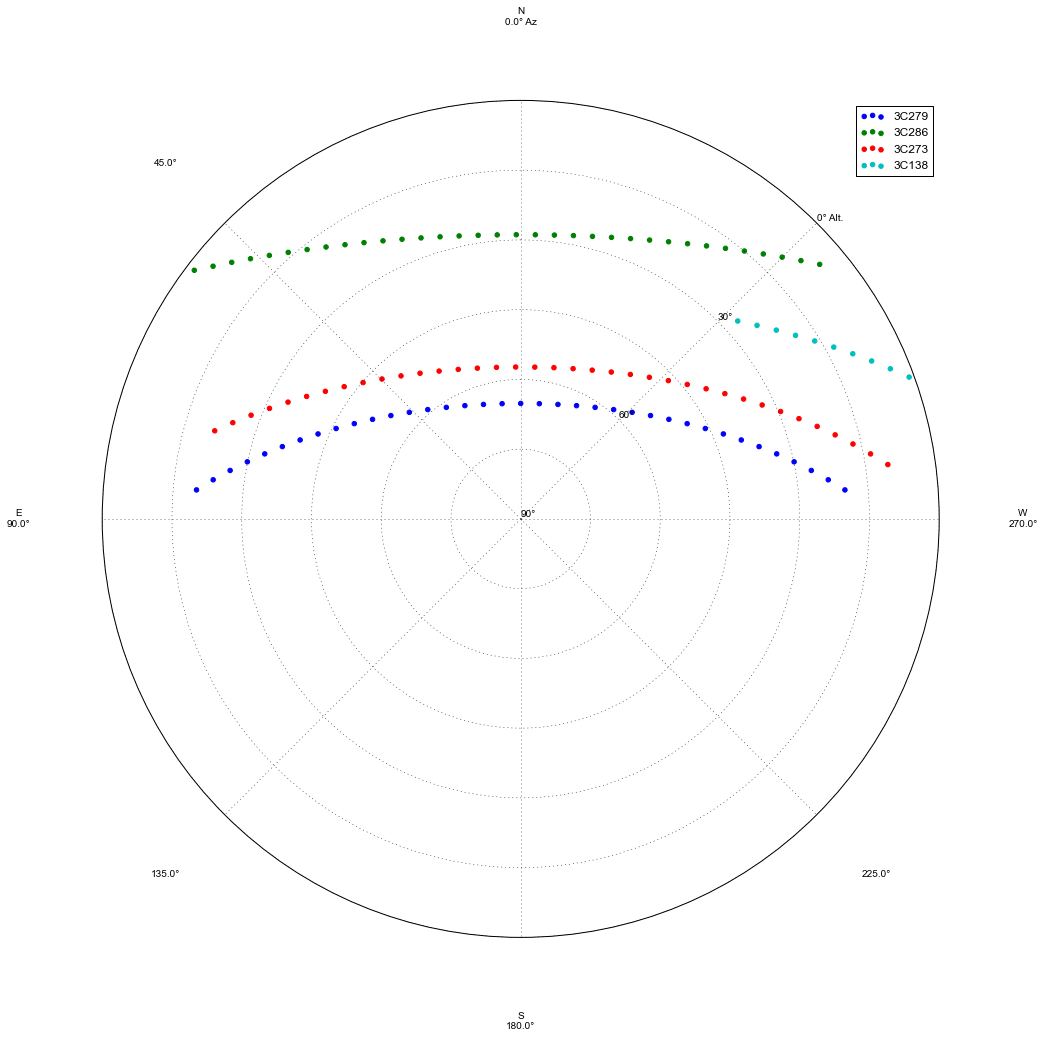

In [8]:

obstimes=rise_t + (set_t -rise_t)*np.linspace(0,1,steps) # default unit is julian days

plt.figure(figsize=(15,15))
#
#
apl.plot_sky(target, kat7,obstimes,style_kwargs={'color':'b'} )
apl.plot_sky(bpcal, kat7,obstimes, style_kwargs={'color':'g'} )
apl.plot_sky(cal1, kat7,obstimes,style_kwargs={'color':'r'})
apl.plot_sky(cal2, kat7,obstimes,style_kwargs={'color':'c'})
# colours chosen to match other plots
plt.legend()
plt.show()


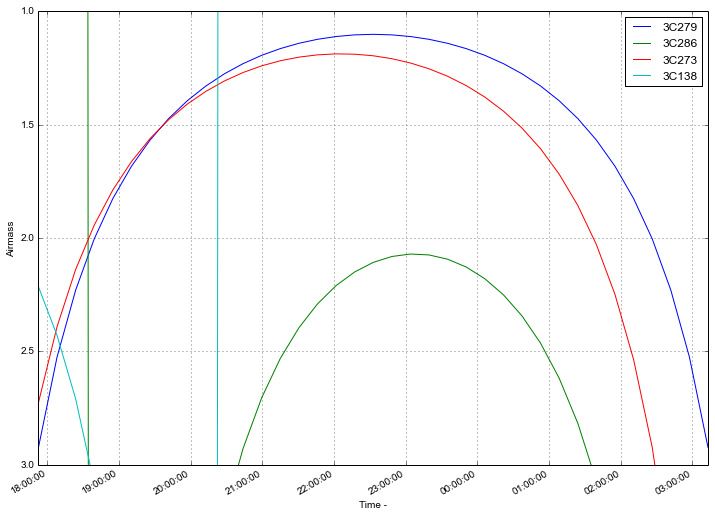

In [6]:
plt.figure(figsize=(12,9))
apl.plot_airmass(target, kat7, obstimes)
apl.plot_airmass(bpcal, kat7, obstimes)
apl.plot_airmass(cal1, kat7, obstimes)
apl.plot_airmass(cal2, kat7, obstimes)
plt.legend()
plt.grid()
plt.show()

/usr/local/lib/python2.7/dist-packages/astropy/time/core.py:676: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif longitude == 'greenwich':


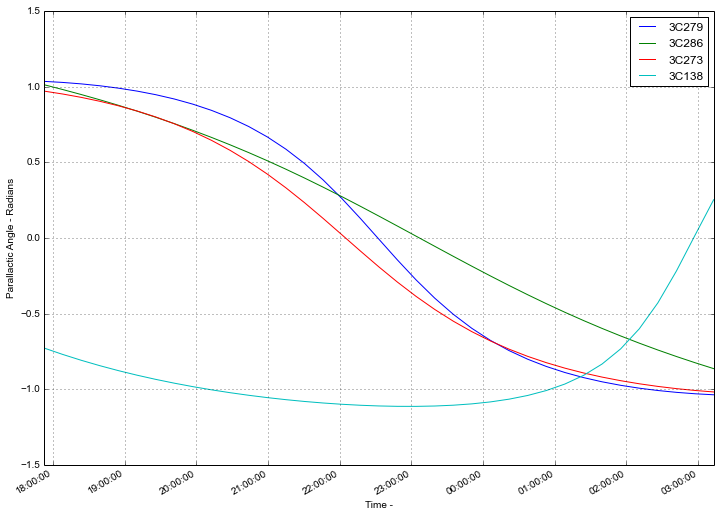

In [7]:
plt.figure(figsize=(12,9))
apl.plot_parallactic(target, kat7, obstimes)
apl.plot_parallactic(bpcal, kat7, obstimes)
apl.plot_parallactic(cal1, kat7, obstimes)
apl.plot_parallactic(cal2, kat7, obstimes)
plt.legend()
plt.grid()